# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find("table", {"class":"table"})

extract_df = pd.read_html(str(table))
mars_df = extract_df[0]

mars_df.head()

C:\Users\gmyou\AppData\Local\Temp\ipykernel_6280\2922932891.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  extract_df = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
table_rows = table.find_all("tr", {"class": "data-row"})
for table_row in table_rows[0:10]:
    id = table_row.find_all("td")[0].text
    terrestrial_date = table_row.find_all("td")[1].text
    print(terrestrial_date)

2012-08-16
2012-08-17
2012-08-18
2012-08-19
2012-08-20
2012-08-21
2012-08-22
2012-08-23
2012-08-27
2012-08-28


In [7]:
# Confirm DataFrame was created successfully
print(mars_df.head())

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [9]:
# Change data types for data analysis
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])


In [10]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
# Count the total number of sols
num_month = mars_df['month'].nunique()
print(f"Total number of month: {num_month}")

Total number of month: 12


In [12]:
# 2. How many sols (Martian days) worth of data are there?
# Count the total number of sols
num_sols = mars_df['sol'].nunique()
print(f"Total number of sols: {num_sols}")

Total number of sols: 1867


In [13]:
# 3. What is the average minimum temperature by month?
# Group by 'month' and calculate the average minimum temperature
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print("Average minimum temperature by month:")
print(avg_min_temp_by_month)

Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


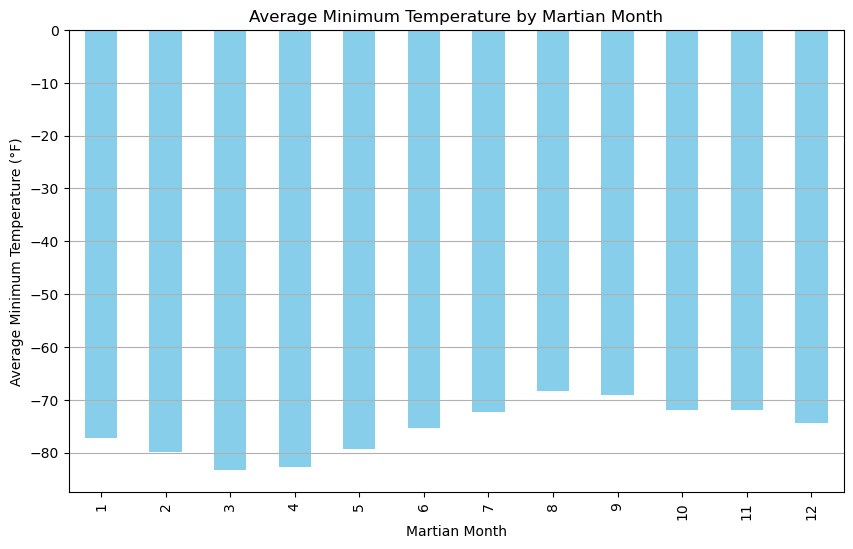

In [28]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°F)')
plt.grid(axis='y')
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Find the month with the lowest and highest average minimum temperature
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()

print(f"Coldest Month: {coldest_month}, Average Min Temp: {avg_min_temp_by_month[coldest_month]:.2f}")
print(f"Hottest Month: {hottest_month}, Average Min Temp: {avg_min_temp_by_month[hottest_month]:.2f}")


Coldest Month: 3, Average Min Temp: -83.31
Hottest Month: 8, Average Min Temp: -68.38


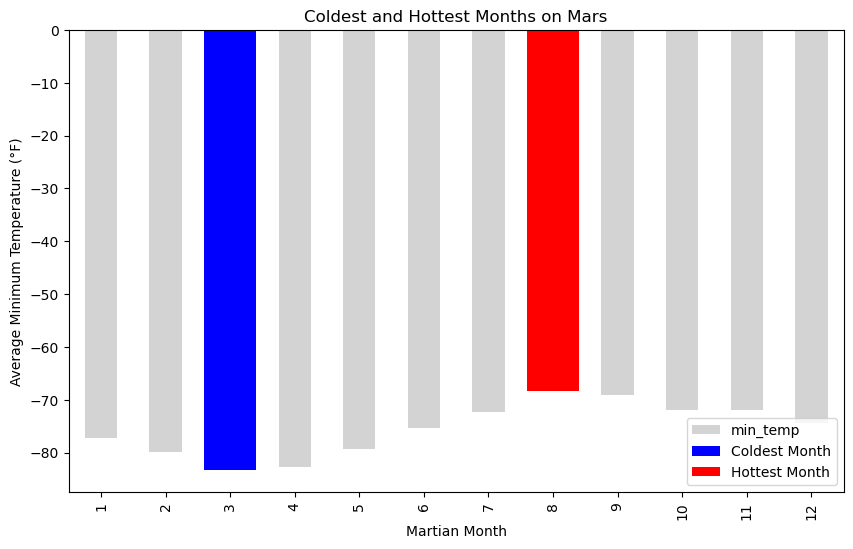

In [27]:
#Visualize the coldest and hottest months 
avg_min_temp_by_month.plot(kind='bar', color='lightgray', figsize=(10, 6))
plt.bar(coldest_month - 1, avg_min_temp_by_month[coldest_month], color='blue', label='Coldest Month')
plt.bar(hottest_month - 1, avg_min_temp_by_month[hottest_month], color='red', label='Hottest Month')
plt.title('Coldest and Hottest Months on Mars')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°F)')
plt.legend()
plt.show()

In [22]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print("Average pressure by month:")
print(avg_pressure_by_month)

Average pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


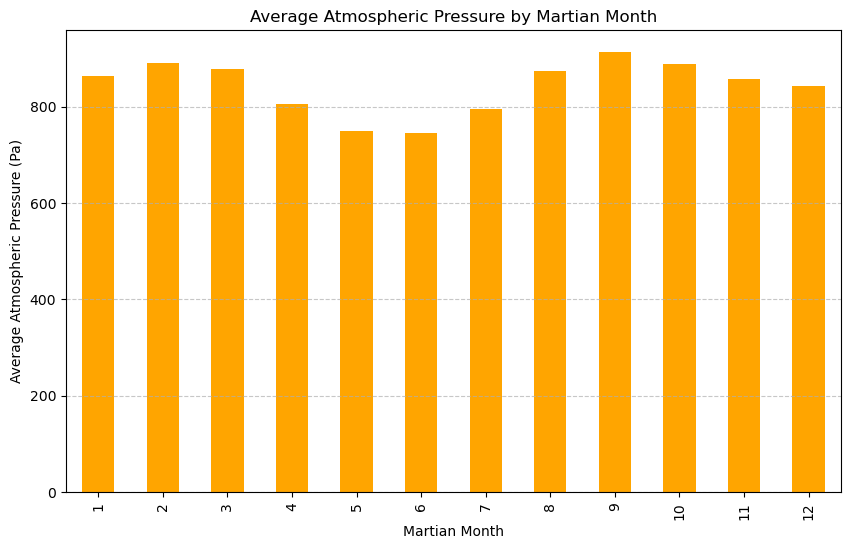

In [23]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lp_month = avg_pressure_by_month.idxmin()
hp_month = avg_pressure_by_month.idxmax()

print(f"Lowest Pressure Month: {lp_month}, Average Lowest Pressure: {avg_pressure_by_month[lp_month]:.2f}")
print(f"Highest Pressure Month: {hp_month}, Average Highest Pressure: {avg_pressure_by_month[hp_month]:.2f}")

Lowest Pressure Month: 6, Average Lowest Pressure: 745.05
Highest Pressure Month: 9, Average Highest Pressure: 913.31


In [19]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Calculate the range of terrestrial dates
mars_year_length = (mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()).days
print(f"Martian year length in Earth days: {mars_year_length}")


Martian year length in Earth days: 2021


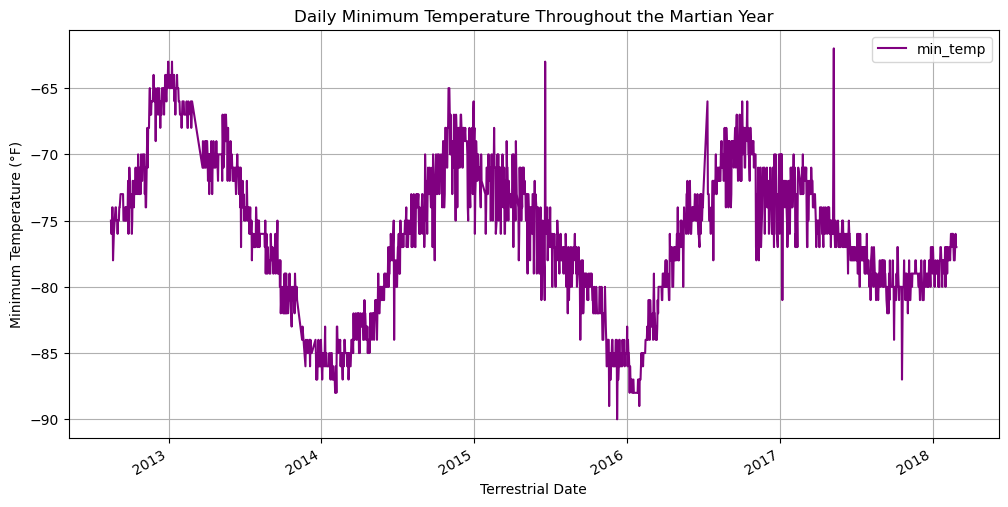

In [29]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df.plot(x='terrestrial_date', y='min_temp', kind='line', figsize=(12, 6), color='purple')
plt.title('Daily Minimum Temperature Throughout the Martian Year')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°F)')
plt.grid()
plt.show()

#### Minimum Temperature

# Going off seasonal temperature trends, the coldest month has the lowest average minimum temperature, likely during the Martian winter. In contrast, the warmest month has the highest average minimum temperature, corresponding to the Martian summer. TT 2016 had the lowest temperatures to date on Mars. 

#### Atmospheric Pressure

# The highest atmospheric pressure is observed during certain months, likely corresponding to the colder seasons when the CO₂ in the polar ice caps sublimates into the atmosphere, increasing overall atmospheric density. Conversely, the lowest atmospheric pressure occurs during warmer months, when CO₂ freezes back into the polar ice caps, reducing the atmospheric density.

#### Year Length

# For starters, a sol is slightly longer than an Earth day, lasting about 24 hours and 39 minutes. In Earth terms, a Martian year is approximately 2021 Earth days. By examining the dataset, I calculated the total number of sols recorded, representing Martian years covered. Additionally, Mars has four distinct seasons (spring, summer, autumn, and winter), similar to Earth, but they last nearly twice as long due to the longer Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_analysis.csv', index=False)
print("Data saved to 'mars_weather_analysis.csv'")

In [ ]:
browser.quit()